In [54]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp
import sklearn.cluster as cluster
import sklearn.metrics as skmet
import matplotlib
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [55]:
#User-defined function to read data and clean
def read_data(file_path):
    df = pd.read_csv(file_path,na_values=[".."])  # Assuming data is in a CSV file

    # Clean the data (handle missing values, etc.)
    df_cleaned = df.dropna()

    return df_cleaned

#file_path="3fcaeb11-610a-47dd-a30c-c68bda5e49c7_1990Data.csv"
#df_cleaned = read_data(file_path)
#df_cleaned

In [56]:
# User-defined function for transposing data
def preprocess_data(df):
    # Transpose the dataframe
    df_transposed = df_cleaned.transpose()

    return df_transposed

#df_transposed = preprocess_data(df_cleaned)
#df_transposed

In [57]:
corr = df_cleaned.corr(numeric_only=True)
print(corr.round(4))

                                GDP per capita  CO2 emissions  \
GDP per capita                          1.0000         0.4704   
CO2 emissions                           0.4704         1.0000   
Total greenhouse gas emissions          0.0582         0.1662   
Forest area                            -0.0107        -0.1055   
Population, total                      -0.0411         0.0196   
Methane emissions                       0.0144         0.1548   

                                Total greenhouse gas emissions  Forest area  \
GDP per capita                                          0.0582      -0.0107   
CO2 emissions                                           0.1662      -0.1055   
Total greenhouse gas emissions                          1.0000      -0.0318   
Forest area                                            -0.0318       1.0000   
Population, total                                       0.8280      -0.0533   
Methane emissions                                       0.9053      -0

In [58]:
def scale_and_plot(df, columns):
    """
    Scale specified columns in a DataFrame using RobustScaler and plot a scatter plot.

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to be scaled and plotted

    Returns:
    - None (plots the scatter plot)
    """
    # Create a RobustScaler object
    scaler = pp.RobustScaler()

    # Extract specified columns from the DataFrame
    df_clust = df[columns]

    # Fit the scaler on the data
    scaler.fit(df_clust)

    # Apply scaling to the selected columns
    df_norm = scaler.transform(df_clust)

    # Plot the scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(df_norm[:, 0], df_norm[:, 1], 10, marker="o")
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title("Scaled Scatter Plot")
    plt.show()
    return df_norm, df_clust

#df_norm, df_clust = scale_and_plot(df_cleaned, ["CO2 emissions", "GDP per capita"])

In [59]:
def one_silhoutte(xy, n):
    """ Calculates silhoutte score for n clusters """
    # set up the clusterer with the number of expected clusters
    kmeans = cluster.KMeans(n_clusters=n, n_init=20)
    # Fit the data, results are stored in the kmeans object
    kmeans.fit(xy) # fit done on x,y pairs
    labels = kmeans.labels_
    # calculate the silhoutte score
    score = (skmet.silhouette_score(xy, labels))
    return score


# calculate silhouette score for 2 to 10 clusters
for ic in range(2, 11):
    score = one_silhoutte(df_norm, ic)
    print(f"The silhouette score for {ic: 3d} is {score: 7.4f}") # allow for minus signs

The silhouette score for   2 is  0.6987
The silhouette score for   3 is  0.6715


The silhouette score for   4 is  0.6657
The silhouette score for   5 is  0.5874
The silhouette score for   6 is  0.5847
The silhouette score for   7 is  0.5852
The silhouette score for   8 is  0.5093
The silhouette score for   9 is  0.5154
The silhouette score for  10 is  0.5196


In [60]:
def plot_kmeans_clusters(df, n_clusters=3, n_init=20,cmap_name='Paired'):
    # Assuming df has columns "CO2 emissions" and "GDP per capita"
    x = df["CO2 emissions"].values
    y = df["GDP per capita"].values
    
    # Normalize the data
    scaler = StandardScaler()
    df_norm = scaler.fit_transform(df)
    
    # Set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)
    
    # Fit the data, results are stored in the kmeans object
    kmeans.fit(df_norm)
    
    # Extract cluster labels
    labels = kmeans.labels_
    
    # Extract the estimated cluster centres and convert to original scales
    cen = kmeans.cluster_centers_
    cen = scaler.inverse_transform(cen)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    
    # Create a custom colormap
    cmap = plt.cm.get_cmap(cmap_name, n_clusters)
    custom_cmap = ListedColormap(cmap.colors)
    
    # Plotting
    plt.figure(figsize=(6.0, 4.0))
    
    # Plot data with kmeans cluster number
    scatter = plt.scatter(x, y, 10, labels, marker="o", cmap=custom_cmap)
    
    # Show cluster centres
    plt.scatter(xkmeans, ykmeans, 60, "k", marker="d",label='Cluster Centers')
    
    plt.legend(*scatter.legend_elements(), title='Clusters')
    plt.xlabel("CO2 emissions")
    plt.ylabel("GDP per capita")
    plt.title(f'KMeans Clustering (n_clusters={n_clusters})')
    plt.show()

#plot_kmeans_clusters(df_clust, n_clusters=3, n_init=20)

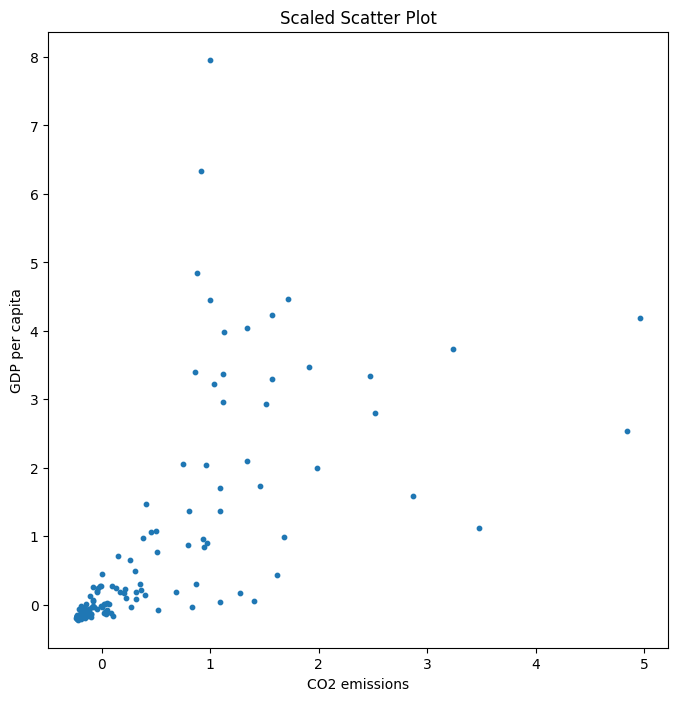

C:\Users\Zain\AppData\Local\Temp\ipykernel_21052\1128710586.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, n_clusters)


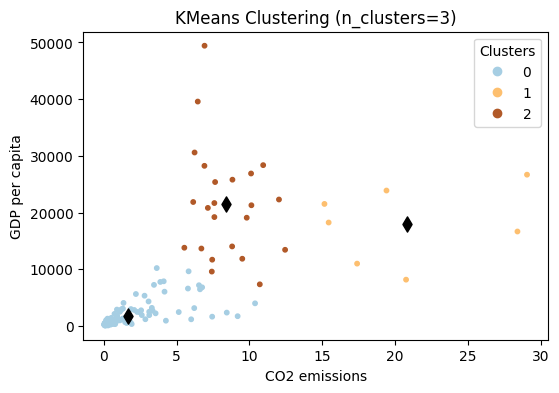

In [61]:
file_path="3fcaeb11-610a-47dd-a30c-c68bda5e49c7_1990Data.csv"
df_cleaned = read_data(file_path)
df_transposed = preprocess_data(df_cleaned)
df_norm, df_clust = scale_and_plot(df_cleaned, ["CO2 emissions", "GDP per capita"])
plot_kmeans_clusters(df_clust, n_clusters=3, n_init=20)

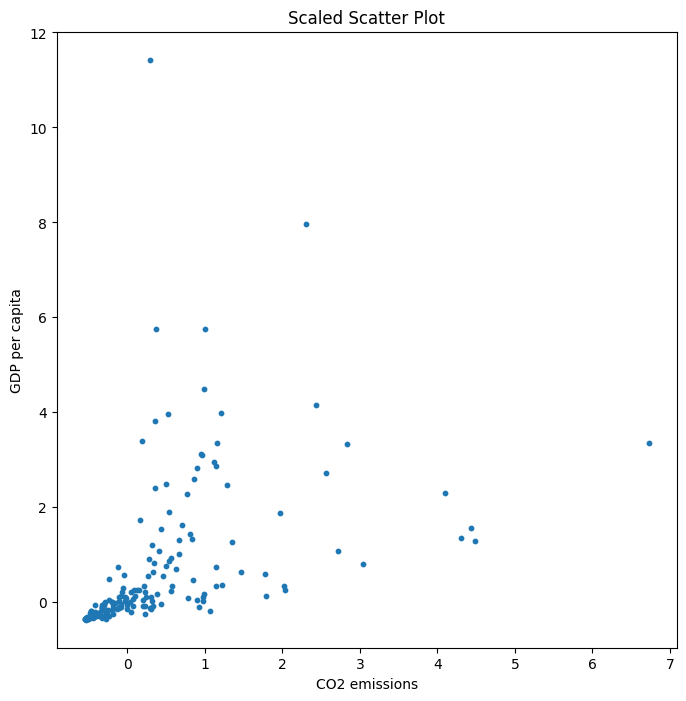

C:\Users\Zain\AppData\Local\Temp\ipykernel_21052\1128710586.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, n_clusters)


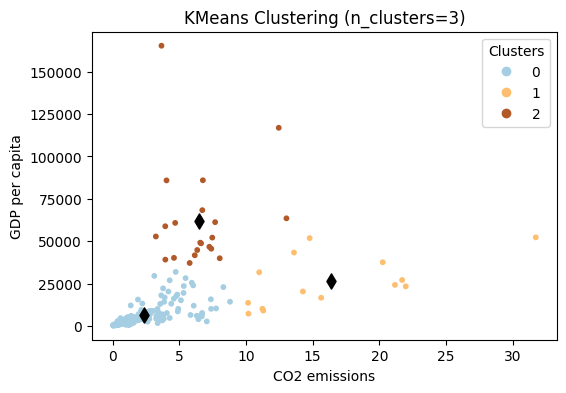

In [62]:
file_path="24c5c998-bdaa-4f16-a503-78348248cb9c_2020Data.csv"
df_cleaned = read_data(file_path)
df_transposed = preprocess_data(df_cleaned)
df_norm, df_clust = scale_and_plot(df_cleaned, ["CO2 emissions", "GDP per capita"])
plot_kmeans_clusters(df_clust, n_clusters=3, n_init=20)